In [1]:
import pandas as pd
import numpy as np
import scipy.signal as scisig

subject_code = 'L'
task = 'task3'

calc_window = 30
slide_window = 1

df_rri = pd.read_csv("../data/" + subject_code + "/RRI/RRI_" + task + ".csv")
df_log = pd.read_csv("../log/" + subject_code + "/" + task + ".csv")

In [2]:
df_rri

,t,RRI
0,0,689.000000
1,1,687.703805
2,2,725.689735
3,3,752.115418
4,4,809.071984
...,...,...
241,251,772.926379
242,252,797.576793
243,253,847.225550
244,254,943.931722


In [3]:
df_log

,answer,choicedCardRule,sortingRule,RT
0,1,1,0,2721.5763
1,1,1,0,1276.9902
2,0,0,0,1453.2234
3,0,0,0,708.7547
4,0,0,0,932.7704
...,...,...,...,...
91,0,2,2,1556.9614
92,0,2,2,915.4185
93,0,2,2,1331.2981
94,0,2,2,2123.5612


In [4]:

t_list = []
t = 0
for rt in df_log[df_log.columns[3]]:
    t += rt/1000 + 1
    t_list.append(t)
df_log['t'] = t_list
df_log

,answer,choicedCardRule,sortingRule,RT,t
0,1,1,0,2721.5763,3.721576
1,1,1,0,1276.9902,5.998567
2,0,0,0,1453.2234,8.451790
3,0,0,0,708.7547,10.160545
4,0,0,0,932.7704,12.093315
...,...,...,...,...,...
91,0,2,2,1556.9614,243.302606
92,0,2,2,915.4185,245.218025
93,0,2,2,1331.2981,247.549323
94,0,2,2,2123.5612,250.672884


In [5]:
import math



RRI = df_rri['RRI']
pNN50 = []
RMSSD = []
diff = []
t = []
i = calc_window
while i < len(RRI):
    if math.isnan(RRI[i]):
        break
    pnncnt = 0
    rmssd = 0
    for j in range(i-calc_window, i-1):
        diff.append(RRI[j+1]-RRI[j])
        if abs(diff[-1])>=50:
            pnncnt += 1
        rmssd += diff[-1]**2          
    pNN50.append(pnncnt/calc_window)
    RMSSD.append(math.sqrt(rmssd/(calc_window-1)))
    t.append(i)
    i += slide_window
    
df_performance = pd.DataFrame()
df_performance['t'] = t
df_performance['pNN50'] = pNN50
df_performance['RMSSD'] = RMSSD

In [6]:
RRI = df_rri['RRI']
CVRR = []

i = calc_window
while i < len(RRI):
    if math.isnan(RRI[i]):
        break
    m_rri = np.mean(RRI)
    cvrr = 0
    for j in range(i-calc_window, i-1):
        cvrr += (RRI[j]-m_rri)**2
    cvrr = np.sqrt(cvrr/calc_window)/m_rri
    CVRR.append(cvrr)
    i+=1
df_performance['CVRR'] = CVRR
df_performance

,t,pNN50,RMSSD,CVRR
0,30,0.200000,76.478993,0.103219
1,31,0.200000,76.677586,0.100433
2,32,0.200000,76.397482,0.097360
3,33,0.200000,76.279772,0.096157
4,34,0.166667,75.543062,0.095659
...,...,...,...,...
211,241,0.033333,25.475756,0.069913
212,242,0.033333,25.936570,0.069583
213,243,0.033333,26.038087,0.069698
214,244,0.033333,27.134501,0.069680


In [7]:
import numpy as np
RRI = df_rri['RRI']
SDNN = []
i = calc_window
while i < len(RRI):
    if math.isnan(RRI[i]):
        break
    SDNN.append(np.std(RRI.iloc[i-calc_window:i]))
    i += slide_window
df_performance['SDNN'] = SDNN
df_performance[:10]

,t,pNN50,RMSSD,CVRR,SDNN
0,30,0.200000,76.478993,0.103219,67.261589
1,31,0.200000,76.677586,0.100433,67.009410
2,32,0.200000,76.397482,0.097360,66.874931
3,33,0.200000,76.279772,0.096157,67.135851
4,34,0.166667,75.543062,0.095659,67.597372
5,35,0.166667,75.765146,0.095625,68.701205
6,36,0.166667,75.591956,0.095844,68.940624
7,37,0.166667,75.556763,0.095186,67.366511
8,38,0.133333,74.896324,0.094838,66.870631
9,39,0.133333,74.668086,0.095082,67.768404


In [8]:

RRI = df_rri['RRI']
i = calc_window
HR = []
while i<len(RRI):
    if math.isnan(RRI.iloc[i]):
        break
    HR.append(60000/RRI.iloc[i])
    i += 1  
df_performance['HR'] = HR
df_performance

,t,pNN50,RMSSD,CVRR,SDNN,HR
0,30,0.200000,76.478993,0.103219,67.261589,74.824657
1,31,0.200000,76.677586,0.100433,67.009410,73.529484
2,32,0.200000,76.397482,0.097360,66.874931,74.748682
3,33,0.200000,76.279772,0.096157,67.135851,74.688593
4,34,0.166667,75.543062,0.095659,67.597372,71.124868
...,...,...,...,...,...,...
211,241,0.033333,25.475756,0.069913,33.572388,77.627057
212,242,0.033333,25.936570,0.069583,35.584802,75.227866
213,243,0.033333,26.038087,0.069698,35.961452,70.819394
214,244,0.033333,27.134501,0.069680,34.800746,63.563919


In [9]:
from hrv import LP_cal


RRI = df_rri['RRI']
LPS = []
CSI = []
CVI = []
i = calc_window
while i < len(RRI):
    if math.isnan(RRI.iloc[i]):
        break
    lps, csi, cvi = LP_cal(RRI.iloc[i-calc_window:i])
    LPS.append(lps)
    CSI.append(csi)
    CVI.append(cvi)
    i += slide_window
    
df_performance['LPS'] = LPS
df_performance['CSI'] = CSI
df_performance['CVI'] = CVI
df_performance.head()

,t,pNN50,RMSSD,CVRR,SDNN,HR,LPS,CSI,CVI
0,30,0.200000,76.478993,0.103219,67.261589,74.824657,11202.653927,1.765250,3.552171
1,31,0.200000,76.677586,0.100433,67.009410,73.529484,10974.064100,1.752629,3.543218
2,32,0.200000,76.397482,0.097360,66.874931,74.748682,11063.141127,1.754510,3.546729
3,33,0.200000,76.279772,0.096157,67.135851,74.688593,11241.324665,1.773737,3.553668
4,34,0.166667,75.543062,0.095659,67.597372,71.124868,11400.201952,1.777480,3.559763


In [10]:
"""
from hrv import psd_cal
from hrv import calc_LF_HF

HF = []
LF = []
LF_HF = []
total_pow = []


RRI = df_rri['RRI']
i = calc_window

while i < len(RRI):
    if math.isnan(RRI.iloc[i]):
        break
    P, freq = psd_cal(RRI.values[i-calc_window:i])
    vlf, lf, hf = calc_LF_HF(P, freq)
    HF.append(hf)
    LF.append(lf)
    LF_HF.append(lf/hf)
    total_pow.append(lf+hf)
    i += slide_window

df_performance['HF'] = HF
df_performance['LF'] = LF
df_performance['LF/HF'] = LF_HF
df_performance['TotalPow'] = total_pow
df_performance
"""

"\nfrom hrv import psd_cal\nfrom hrv import calc_LF_HF\n\nHF = []\nLF = []\nLF_HF = []\ntotal_pow = []\n\n\nRRI = df_rri['RRI']\ni = calc_window\n\nwhile i < len(RRI):\n    if math.isnan(RRI.iloc[i]):\n        break\n    P, freq = psd_cal(RRI.values[i-calc_window:i])\n    vlf, lf, hf = calc_LF_HF(P, freq)\n    HF.append(hf)\n    LF.append(lf)\n    LF_HF.append(lf/hf)\n    total_pow.append(lf+hf)\n    i += slide_window\n\ndf_performance['HF'] = HF\ndf_performance['LF'] = LF\ndf_performance['LF/HF'] = LF_HF\ndf_performance['TotalPow'] = total_pow\ndf_performance\n"

In [11]:
"""
from sklearn.mixture import GaussianMixture

params = ['HR']

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(df_performance[params].values)

df_performance['class'] = gmm.predict(df_performance[params].values)
df_performance.head()
"""

"\nfrom sklearn.mixture import GaussianMixture\n\nparams = ['HR']\n\ngmm = GaussianMixture(n_components=2, random_state=42)\ngmm.fit(df_performance[params].values)\n\ndf_performance['class'] = gmm.predict(df_performance[params].values)\ndf_performance.head()\n"

In [12]:

df_eda = pd.read_csv("../data/" + subject_code + "/EDA/EDA_" + task + ".csv")


index_list = [i for i in range(0, len(df_eda['t']), 4)]
df_EDA = df_eda.iloc[index_list].reset_index()


if df_EDA['t'].iloc[-1] > df_performance['t'].iloc[-1]:
    for i, t in enumerate(df_EDA['t']):
        if t==df_performance['t'].iloc[-1]:
            df_EDA = df_EDA.iloc[:i+1]
            break
else:
    for i, t in enumerate(df_performance['t']):
        if t==df_EDA['t'].iloc[-1]:
            df_performance = df_performance.iloc[:i+1]
            break

i = calc_window
SCL = []
while i<len(df_EDA):
    if math.isnan(df_EDA['filtered_eda'].iloc[i]):
        
        break
    SCL.append(np.mean(df_EDA['filtered_eda'].iloc[i-calc_window:i]))
    i += 1  


df_EDA = df_EDA[30:].reset_index()
print(df_performance['t'], df_EDA['t'])
df_performance['SCL'] = SCL
df_performance['EDA'] = df_EDA['filtered_eda']

df_performance

0       30
1       31
2       32
3       33
4       34
      ... 
211    241
212    242
213    243
214    244
215    245
Name: t, Length: 216, dtype: int64 0       30.0
1       31.0
2       32.0
3       33.0
4       34.0
       ...  
211    241.0
212    242.0
213    243.0
214    244.0
215    245.0
Name: t, Length: 216, dtype: float64


,t,pNN50,RMSSD,CVRR,SDNN,HR,LPS,CSI,CVI,SCL,EDA
0,30,0.200000,76.478993,0.103219,67.261589,74.824657,11202.653927,1.765250,3.552171,0.765470,0.743183
1,31,0.200000,76.677586,0.100433,67.009410,73.529484,10974.064100,1.752629,3.543218,0.765365,0.744110
2,32,0.200000,76.397482,0.097360,66.874931,74.748682,11063.141127,1.754510,3.546729,0.765364,0.745260
3,33,0.200000,76.279772,0.096157,67.135851,74.688593,11241.324665,1.773737,3.553668,0.765474,0.743256
4,34,0.166667,75.543062,0.095659,67.597372,71.124868,11400.201952,1.777480,3.559763,0.765552,0.737664
...,...,...,...,...,...,...,...,...,...,...,...
211,241,0.033333,25.475756,0.069913,33.572388,77.627057,1424.986950,4.311954,2.656661,0.746687,0.779369
212,242,0.033333,25.936570,0.069583,35.584802,75.227866,1487.667488,4.444925,2.675356,0.749034,0.775570
213,243,0.033333,26.038087,0.069698,35.961452,70.819394,1519.633955,4.533161,2.684589,0.751276,0.786376
214,244,0.033333,27.134501,0.069680,34.800746,63.563919,1578.864411,4.210762,2.701195,0.754011,0.788114


In [13]:


correct_list = []
error_list = []
CA_list = []
PE_list = []   #保続性エラー数(ネルソン型)
NPE_list = []  #非保続性エラー数(ネルソン型)
PEm_list = []  #保続性エラー(ミルナー型)
NPEm_list = [] #非保続性エラー(ミルナー型)
DMS_list = []  #セットの維持困難
TO_list = []   #タイムオーバー数
RT_list = []
total_error=0
start = 0
while True:
    if df_log['t'].iloc[start] > 30:
        break
    start += 1
for j in range(start, len(df_log['answer'])):  
    calc_window = 0
    while True:
        if df_log['t'].iloc[j]-df_log['t'].iloc[j-calc_window] > 30:
            break
        calc_window += 1
        if j==calc_window:
            calc_window=j
            break
        
    
    log_data = df_log.iloc[j-calc_window:j]
    n_sheet = len(log_data['answer'])
    answer_count = 0
    correct_count = 0
    error_count = 0
    continuous_correct = 0
    pre_error_rule = -1
    pre_sorting_rule = -1
    CA = 0   #達成カテゴリー数
    PE = 0   #保続性エラー数(ネルソン型)
    NPE = 0  #非保続性エラー数(ネルソン型)
    PEm = 0  #保続性エラー(ミルナー型)
    NPEm = 0 #非保続性エラー(ミルナー型)
    FMS = 0  #セットの維持困難
    TO = 0   #タイムオーバー数
    

    for i in range(n_sheet):
        if log_data['answer'].iloc[i] == 0:
            correct_count += 1
            continuous_correct += 1
            if continuous_correct==6:
                CA += 1
                continuous_correct = 0
                pre_sorting_rule = log_data['sortingRule'].iloc[i]
        elif log_data['answer'].iloc[i] == 1:
            error_count += 1
            if continuous_correct >= 2:
                FMS += 1
            if pre_error_rule==log_data['choicedCardRule'].iloc[i]:
                PE += 1
            if log_data['choicedCardRule'].iloc[i] == pre_sorting_rule:
                PEm += 1
            continuous_correct = 0
            pre_error_rule = log_data['choicedCardRule'].iloc[i]
        else:
            TO += 1
            continue
        answer_count += 1
    correct_list.append(correct_count / answer_count)
    error_list.append(error_count / answer_count)
    RT_list.append(log_data[log_data.columns[3]].mean())
    PE_list.append(PE/answer_count)
    NPE_list.append((error_count - PE)/answer_count)
    PEm_list.append(PEm/answer_count)
    NPEm_list.append((error_count - PEm)/answer_count)
    DMS_list.append(FMS/answer_count)
    
#不快音が出た時の時間の取得
total_error = 0
sound_tag = []
for i in range(len(df_log['answer'])):
    if df_log['answer'].iloc[i] == 1:
        total_error+=1
        if total_error%5==0:
            sound_tag.append(i)
t_alert = [df_log['t'].iloc[i] for i in sound_tag]
t_list = df_log['t'].values[start:] 
t_alert

[37.96253300000001, 116.4066533, 163.29208279999997, 219.70207829999995]

In [14]:

start = t_list[0]
end = t_list[-1]
start_index = -1
end_index = -1
for i, t in enumerate(df_performance['t'].values):
    if t >= start and start_index==-1:
        start_index = i
    if t > end and end_index==-1:
        end_index = i
df_performance = df_performance[start_index:end_index]

In [15]:
from scipy.interpolate import interp1d
t = df_performance['t'].values

f_correct = interp1d(t_list, correct_list, kind='cubic')
correct = f_correct(t)
df_performance['correct'] = correct

f_error = interp1d(t_list, error_list, kind='cubic')
error = f_error(t)
df_performance['error'] = error

f_PE = interp1d(t_list, PE_list, kind='cubic')
PE = f_PE(t)
df_performance['PE'] = PE

f_NPE = interp1d(t_list, NPE_list, kind='cubic')
NPE = f_correct(t)
df_performance['NPE'] = NPE

f_PEm = interp1d(t_list, PEm_list, kind='cubic')
PEm = f_correct(t)
df_performance['PEm'] = PEm

f_NPEm = interp1d(t_list, NPEm_list, kind='cubic')
NPEm = f_correct(t)
df_performance['NPEm'] = NPEm

f_DMS = interp1d(t_list, DMS_list, kind='cubic')
DMS = f_correct(t)
df_performance['DMS'] = DMS

df_performance

/Users/sota/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sota/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/sota/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,t,pNN50,RMSSD,CVRR,SDNN,HR,LPS,CSI,CVI,SCL,EDA,correct,error,PE,NPE,PEm,NPEm,DMS
1,31,0.200000,76.677586,0.100433,67.009410,73.529484,10974.064100,1.752629,3.543218,0.765365,0.744110,0.679530,0.320470,0.081319,0.679530,0.679530,0.679530,0.679530
2,32,0.200000,76.397482,0.097360,66.874931,74.748682,11063.141127,1.754510,3.546729,0.765364,0.745260,0.693559,0.306441,0.076452,0.693559,0.693559,0.693559,0.693559
3,33,0.200000,76.279772,0.096157,67.135851,74.688593,11241.324665,1.773737,3.553668,0.765474,0.743256,0.706150,0.293850,0.072101,0.706150,0.706150,0.706150,0.706150
4,34,0.166667,75.543062,0.095659,67.597372,71.124868,11400.201952,1.777480,3.559763,0.765552,0.737664,0.714884,0.285116,0.071641,0.714884,0.714884,0.714884,0.714884
5,35,0.166667,75.765146,0.095625,68.701205,71.345546,11402.242668,1.781245,3.559840,0.765231,0.736147,0.721167,0.278833,0.073733,0.721167,0.721167,0.721167,0.721167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,240,0.033333,24.865706,0.069503,33.178991,74.625756,1426.636996,4.293145,2.657164,0.743929,0.789610,0.669825,0.330175,-0.013447,0.669825,0.669825,0.669825,0.669825
211,241,0.033333,25.475756,0.069913,33.572388,77.627057,1424.986950,4.311954,2.656661,0.746687,0.779369,0.609246,0.390754,0.009503,0.609246,0.609246,0.609246,0.609246
212,242,0.033333,25.936570,0.069583,35.584802,75.227866,1487.667488,4.444925,2.675356,0.749034,0.775570,0.550432,0.449568,0.062822,0.550432,0.550432,0.550432,0.550432
213,243,0.033333,26.038087,0.069698,35.961452,70.819394,1519.633955,4.533161,2.684589,0.751276,0.786376,0.507597,0.492403,0.114875,0.507597,0.507597,0.507597,0.507597


In [16]:
df_scr = pd.read_csv("../data/" + subject_code + "/SCR/SCR_" + task + ".csv")
print(df_scr)
if len(df_scr)!=0:
    for i in range(len(df_scr)):
        if df_scr['PeakTime'].values[i]>df_performance['t'].values[-1]:
            df_scr = df_scr.iloc[:i]
            break

df_scr.to_csv("../data/" + subject_code + "/SCR/" + task + "_modified.csv")


#描画用の30秒以降のSCR
drop_index = []
for i in range(len(df_scr)):
    if df_scr['PeakTime'].values[i]<30:
        drop_index.append(i)
    else:
        continue
df_SCR = df_scr.drop(df_scr.index[drop_index])
df_scr

   Unnamed: 0  PeakTime  BottomTime  PeakStartTime  PeakValue  PeakStartValue  \
0           4     45.00       41.00          41.00   0.826618        0.726173   
1           5    122.00      119.50         119.50   0.766093        0.733776   
2           6    169.25      166.75         166.75   0.760239        0.708330   
3           7    226.25      223.50         223.50   0.829930        0.694671   
4           8    227.00      226.75         223.50   0.821299        0.694671   
5           9    236.75      234.00         234.00   0.815905        0.759881   
6          10    237.50      237.25         234.00   0.814437        0.759881   
7          11    243.00      242.25         242.25   0.786376        0.774293   

   Amplitude  RiseTime  HalfRecoveryTime  
0   0.100446      4.00              4.50  
1   0.032317      2.50              5.50  
2   0.051910      2.50              3.00  
3   0.135259      2.75              5.50  
4   0.126628      3.50              0.00  
5   0.056024

,Unnamed: 0,PeakTime,BottomTime,PeakStartTime,PeakValue,PeakStartValue,Amplitude,RiseTime,HalfRecoveryTime
0,4,45.00,41.00,41.00,0.826618,0.726173,0.100446,4.00,4.50
1,5,122.00,119.50,119.50,0.766093,0.733776,0.032317,2.50,5.50
2,6,169.25,166.75,166.75,0.760239,0.708330,0.051910,2.50,3.00
3,7,226.25,223.50,223.50,0.829930,0.694671,0.135259,2.75,5.50
4,8,227.00,226.75,223.50,0.821299,0.694671,0.126628,3.50,0.00
5,9,236.75,234.00,234.00,0.815905,0.759881,0.056024,2.75,3.50
6,10,237.50,237.25,234.00,0.814437,0.759881,0.054556,3.50,2.75
7,11,243.00,242.25,242.25,0.786376,0.774293,0.012083,0.75,2.75


In [17]:
#df_performance = df_performance[30:]
#df_performance.to_csv("../time_series/" + subject_code + "/" + task + ".csv")


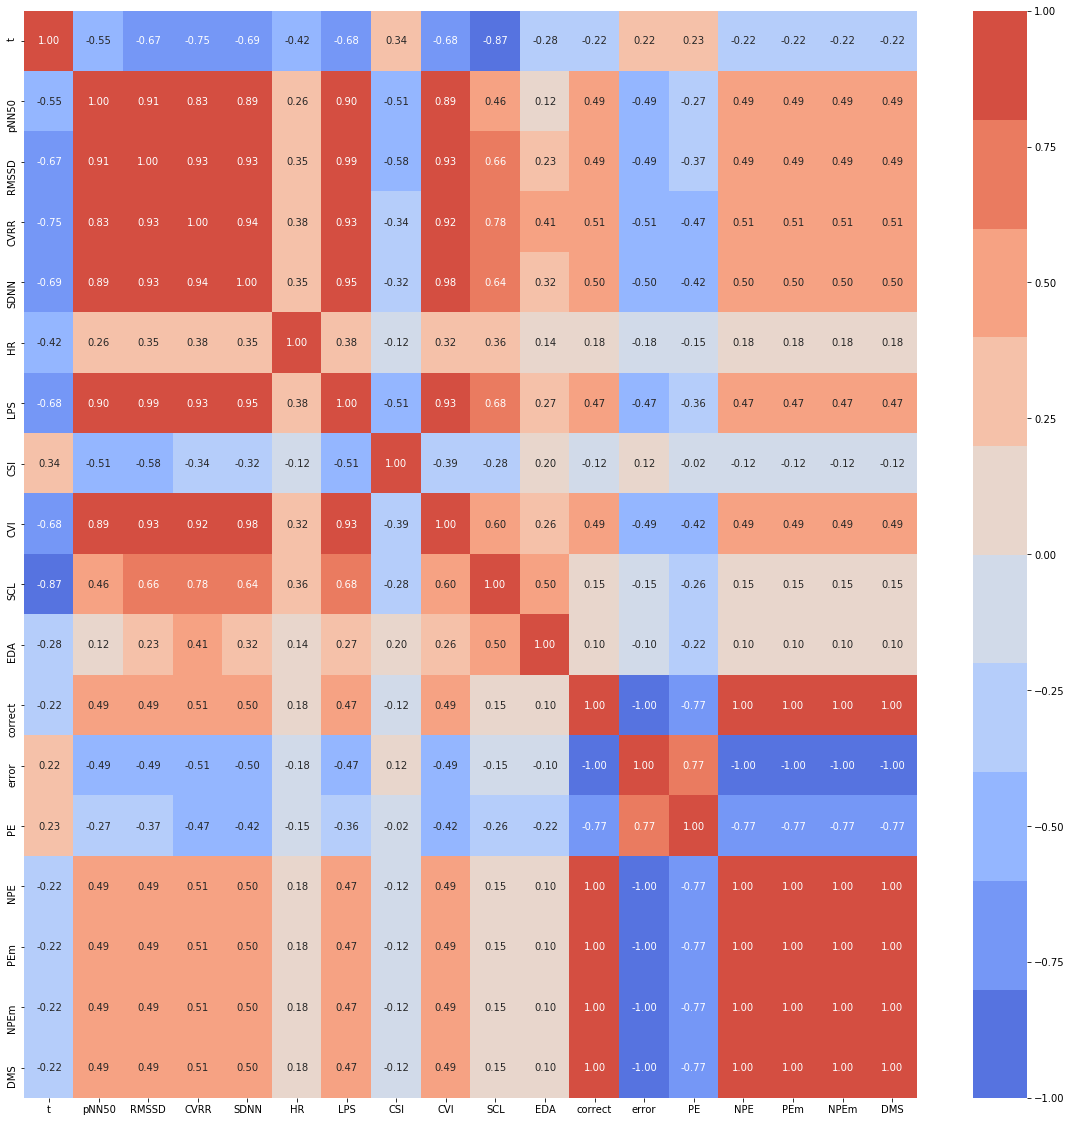

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = df_performance.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

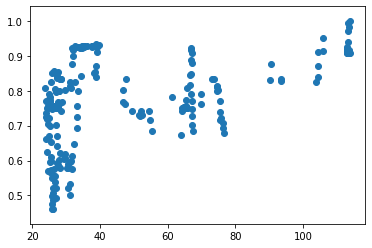

In [19]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.scatter(df_performance['RMSSD'].values, df_performance['correct'].values)


[]

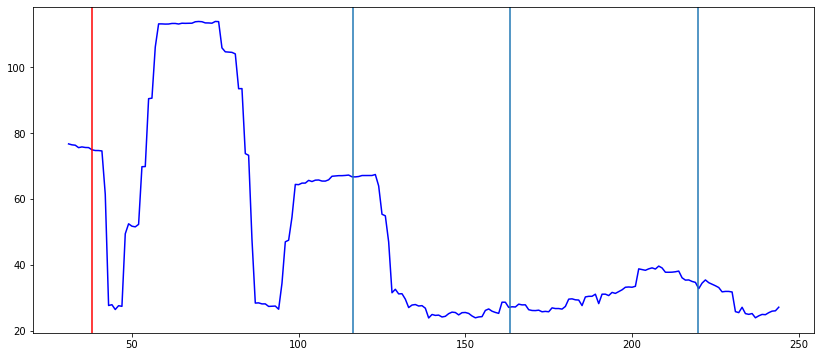

In [20]:


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(df_performance['t'].values, df_performance['RMSSD'].values, color='blue')

for i, alert in enumerate(t_alert):
    if i%4==0:
        plt.axvline(x=alert, color='red')
    else:
        plt.axvline(x=alert)

plt.plot()

[]

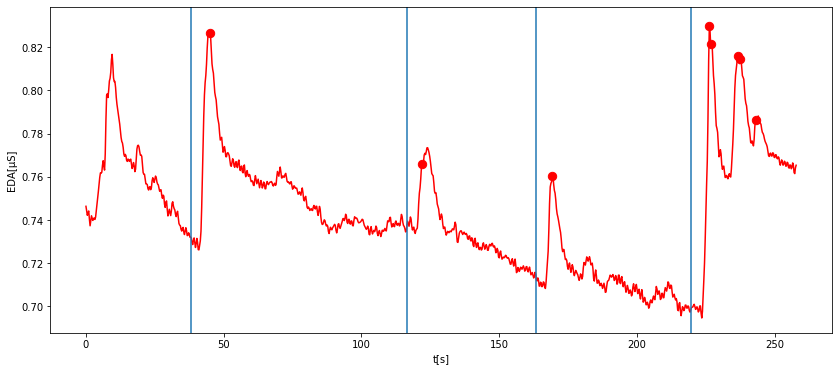

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))

ax.plot(df_eda['t'].values, df_eda['filtered_eda'].values, color='red')
ax.scatter(df_scr['PeakTime'], df_scr['PeakValue'], c='red', s=70, label='SCR')
ax.set_xlabel('t[s]')
ax.set_ylabel('EDA[μS]')


for i, alert in enumerate(t_alert):
     plt.axvline(x=alert)

plt.plot()

In [22]:
df = pd.read_csv('../data/' + subject_code + '/base_params.csv')
df

,Unnamed: 0,LPS,CSI,HR,SDNN,pNN50,RMSSD,CVRR,HF,LF,LF/HF
0,reading,4111.056134,3.144586,65.593109,50.724825,0.305069,48.655184,0.055482,380.109097,720.419226,1.895296
1,u-kt,4037.177820,3.611065,78.055541,46.389653,0.097938,39.242524,0.075340,248.811328,306.568802,1.232134


Text(0.5, 0, 'RMSSD')

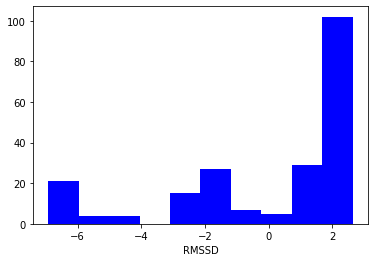

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

RMSSD = (df['RMSSD'].iloc[0]-df_performance['RMSSD'])/(df['RMSSD'].iloc[0]-df['RMSSD'].iloc[1])

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(RMSSD, color='blue')
ax.set_xlabel('RMSSD')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8c84a02410>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c84a02e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8c849f5850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c84a09910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c84a09e10>],
 'means': []}

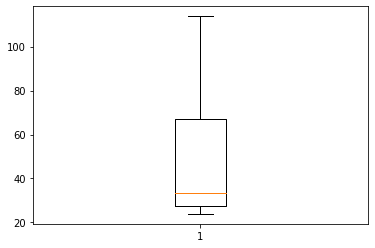

In [24]:
# 箱ひげ図
fig, ax = plt.subplots()

ax.boxplot(df_performance['RMSSD'].values)